In [ ]:
from data_loader import ImageSequence
import fourier_scale_calibration as fsc
from skimage import exposure


In [ ]:
i = 3
print(list(j for j  in  range(i)))
paths_signals = [f'/home/somar/Desktop/2025/For Innusburk presentation/Image processing/eels/s_{j}.ndata1' for j in range(i + 1)]
paths_backgrounds = [f'/home/somar/Desktop/2025/For Innusburk presentation/Image processing/eels/bg_{j}.ndata1' for j in range(i + 1)]

In [ ]:
signals = [ImageSequence(signal) for signal in paths_signals]
backgrounds = [ImageSequence(background) for background in paths_backgrounds]
print(len(signals), len(backgrounds))


In [ ]:
metadata = signals[i].raw_metadata
smoothing_params = {'window_length': 12, 'polyorder': 2}
signal = signals[i - 1].raw_data
print(signal[i].shape)
metadata = signals[i].raw_metadata
metadata[i]

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from scipy.signal import savgol_filter

metadata = signals[i].raw_metadata[i]
# Assuming metadata and signals are already defined
energy_offset = metadata['spatial_calibrations'][0]['offset']
energy_scale = metadata['spatial_calibrations'][0]['scale']
energy_units = metadata['spatial_calibrations'][0]['units']
intensity_units = metadata['intensity_calibration']['units']
signal = signals[i - 1].raw_data[i]

# Generate the energy axis using calibration parameters
energy_axis = energy_offset + energy_scale * np.arange(len(signal))

# Displaying basic info about the data
# print(energy_axis[:5], signal[:5], energy_units, intensity_units)

# Define functions
def power_law(x, a, b):
    return a * x ** b

def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the background region
try:
    # Define background region
    background_region = energy_axis < 50  # The background subtracted area should be always lower than the peak position. 
    background_energy = energy_axis[background_region]
    background_intensity = signal[background_region]
    
    # Initial guesses
    initial_guess_exp = [background_intensity.max(), 0.5, background_intensity.min()]
    initial_guess_pl = [10, 0.1]
    
    # Perform fits
    popt_pl, _ = curve_fit(power_law, background_energy, background_intensity, p0=initial_guess_pl, maxfev=10000)

    # Calculate backgrounds
    background_fit_pl = power_law(energy_axis, *popt_pl)

    # Subtract backgrounds
    background_subtracted_pl = signal - background_fit_pl

    smooth = False
    if smooth:
        # Apply Savitzky-Golay filter for smoothing
        window_length = smoothing_params.get('window_length', 25)
        polyorder = smoothing_params.get('polyorder', 1)
        # Ensure window_length is odd and does not exceed the data length
        if window_length % 2 == 0:
            window_length += 1
        window_length = min(window_length, len(signal))

        smoothed_spectrum = savgol_filter(background_subtracted_pl, window_length=window_length, polyorder=polyorder)
        background_subtracted_pl = smoothed_spectrum

    # Create figure and axes
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Original spectrum with power law background
    ax[0].plot(energy_axis, signal, label='Original Spectrum', color='blue')
    ax[0].plot(energy_axis, background_fit_pl, label='Power Law Background Fit', color='orange', linestyle='--')
    ax[0].set_xlabel(f'Energy Loss ({energy_units})', fontsize=18)
    ax[0].set_ylabel(f'Intensity ({intensity_units})', fontsize=16)
    ax[0].set_title('EELS Spectrum of a Single Pt Atom', fontsize=18)
    ax[0].legend(fontsize=12)
    ax[0].tick_params(axis='both', labelsize=12)
    ax[0].grid(True)

    # Background-subtracted spectrum (power law)
    ax[1].plot(energy_axis, background_subtracted_pl, color='purple')
    ax[1].set_xlabel(f'Energy Loss ({energy_units})', fontsize=18)
    ax[1].set_ylabel(f'Intensity ({intensity_units})', fontsize=16)
    ax[1].set_title('Background-Subtracted EELS Spectrum', fontsize=18)
    ax[1].axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax[1].legend(fontsize=16)
    ax[1].tick_params(axis='both', labelsize=12)
    ax[1].grid(True)

    # Adjust layout and save figure
    plt.tight_layout()
    plt.savefig('Pt_single_atom_eels.png', dpi=600)
    plt.show()


except Exception as e:
    print("An error occurred during the fitting:", e)


In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.font_manager as fm


font_path = "/home/somar/.fonts/SourceSansPro-Semibold.otf" 
font_prop = fm.FontProperties(fname=font_path, size=14)


metadata = signals[i].raw_metadata[i]
# Assuming metadata and signals are already defined
energy_offset = metadata['spatial_calibrations'][0]['offset']
energy_scale = metadata['spatial_calibrations'][0]['scale']
energy_units = metadata['spatial_calibrations'][0]['units']
intensity_units = metadata['intensity_calibration']['units']
signal = signals[i - 1].raw_data[i]

# Generate the energy axis using calibration parameters
energy_axis = energy_offset + energy_scale * np.arange(len(signal))

# Displaying basic info about the data
# print(energy_axis[:5], signal[:5], energy_units, intensity_units)

# Define functions
def power_law(x, a, b):
    return a * x ** b

def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the background region
try:
    # Define background region
    background_region = energy_axis < 50  # The background subtracted area should be always lower than the peak position. 
    background_energy = energy_axis[background_region]
    background_intensity = signal[background_region]
    
    # Initial guesses
    initial_guess_exp = [background_intensity.max(), 0.5, background_intensity.min()]
    initial_guess_pl = [10, 0.1]
    
    # Perform fits
    popt_pl, _ = curve_fit(power_law, background_energy, background_intensity, p0=initial_guess_pl, maxfev=10000)

    # Calculate backgrounds
    background_fit_pl = power_law(energy_axis, *popt_pl)

    # Subtract backgrounds
    background_subtracted_pl = signal - background_fit_pl

    smooth = False
    if smooth:
        # Apply Savitzky-Golay filter for smoothing
        window_length = smoothing_params.get('window_length', 25)
        polyorder = smoothing_params.get('polyorder', 1)
        # Ensure window_length is odd and does not exceed the data length
        if window_length % 2 == 0:
            window_length += 1
        window_length = min(window_length, len(signal))

        smoothed_spectrum = savgol_filter(background_subtracted_pl, window_length=window_length, polyorder=polyorder)
        background_subtracted_pl = smoothed_spectrum

    # Create figure and axes

except Exception as e:
    print("An error occurred during the exponential fit:", e)

try:
    # Create a gradient background
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    gradient = np.vstack((gradient, gradient))

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(14,6))

    # Original spectrum with power law background
    ax[0].imshow(gradient, aspect='auto', extent=(min(energy_axis) , max(energy_axis), min(signal) -500, max(signal) + 500) , cmap='viridis', alpha=0.05)
    ax[0].plot(energy_axis, signal, label='Original Spectrum', color='blue', linewidth=2)
    ax[0].plot(energy_axis, background_fit_pl, label='Power Law Background Fit', color='orange', linestyle='--', linewidth=2)
    ax[0].set_xlabel(f'Energy Loss ({energy_units})', fontsize=18)
    ax[0].set_ylabel(f'Intensity ({intensity_units})', fontsize=16)
    ax[0].set_title('EELS Spectrum of a Single Pt Atom', fontsize=18)
    ax[0].fill_between(energy_axis, signal, background_fit_pl, where=(signal > background_fit_pl), color='blue', alpha=0.3)
    ax[0].fill_between(energy_axis, background_fit_pl, color='red', alpha=0.3)

    ax[0].set_ylim(min(signal) - 500, max(signal) + 500)
    ax[0].legend(fontsize=14)
    ax[0].tick_params(axis='both', labelsize=14, which='both', bottom=False, top=False, left=False, right=False)
    ax[0].grid(True, which='major', linestyle='-', linewidth=0.3)

    # Plot the background-subtracted spectrum
    ax[1].imshow(gradient, aspect='auto', extent=(min(energy_axis), max(energy_axis), min(background_subtracted_pl) - 100, max(background_subtracted_pl) + 100), cmap='viridis', alpha=0.05)
    ax[1].plot(energy_axis, background_subtracted_pl, color='purple', linewidth=2)
    ax[1].set_xlabel(f'Energy Loss ({energy_units})', fontsize=18)
    ax[1].set_ylabel(f'Intensity ({intensity_units})', fontsize=16)
    ax[1].set_title('Background-Subtracted EELS Spectrum', fontsize=18)
    ax[1].axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax[1].set_ylim(min(background_subtracted_pl), max(background_subtracted_pl) + 100)
    ax[1].fill_between(energy_axis, background_subtracted_pl, color='blue', alpha=0.5)
    ax[1].legend(fontsize=16)
    ax[1].tick_params(axis='both', labelsize=14, which='both', bottom=False, top=False, left=False, right=False)
    ax[1].grid(True, which='major', linestyle='-', linewidth=0.5)

    # Add text at the peak location (52 eV)
    peak_energy_1 = 52  # Energy value of the peak
    peak_energy_2 = 73  # Energy value of the peak + 1
    peak_intensity_1 = background_subtracted_pl[peak_energy_1]  # Intensity at the peak
    peak_intensity_2 = background_subtracted_pl[peak_energy_2]  # Intensity at the peak + 1
    text_label_1 = r'$O_{3}$'
    text_label_2 = r'$N_{6}$'

    # Use annotate for precise text placement
    ax[1].annotate(
        text_label_1,  # Text to display
        xy=(peak_energy_1, peak_intensity_1),  # Point to annotate (the peak location)
        xytext=(peak_energy_1 + 5, max(background_subtracted_pl) + 0.02 * max(background_subtracted_pl)),  # Coordinates for the text
        fontproperties=font_prop,  # Font properties
        color='red',  # Text color
        ha='center',  # Horizontal alignment of the text
        va='bottom'   # Vertical alignment of the text
    )
        # Use annotate for precise text placement
    ax[1].annotate(
        text_label_2,  # Text to display
        xy=(peak_energy_2, peak_intensity_2),  # Point to annotate (the peak location)
        xytext=(peak_energy_2 + 5, max(background_subtracted_pl) - 0.05 * max(background_subtracted_pl)),  # Coordinates for the text
        fontproperties=font_prop,  # Font properties
        color='red',  # Text color
        ha='center',  # Horizontal alignment of the text
        va='bottom'   # Vertical alignment of the text
    )

    # Show the plot
    plt.show()

    # Adjust layout and save figure
    plt.tight_layout()
    plt.savefig('Pt_single_atom_eels.png', dpi=600)
    plt.show()


except Exception as e:
    print("An error occurred during the exponential fit:", e)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fp = f'/home/somar/Desktop/2025/ASEM/images for asem/Sequence Synchronized EELS 01.ndata1'           

image = ImageSequence(fp).raw_data  # Shape (height, width, energy)
image[0]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fp = f'/home/somar/Desktop/2025/ASEM/images for asem/Sequence Synchronized EELS 01.ndata1'           

image = ImageSequence(fp).raw_data  # Shape (height, width, energy)
print(image)
# Define the energy range
energy_min, energy_max = 52.0, 118.2


energy_axis = np.linspace(0, 120, 512)  

# Find indices corresponding to the desired energy range
energy_indices = np.where((energy_axis >= energy_min) & (energy_axis <= energy_max))[0]

# Sum the intensity over the selected energy range, or use the mean in case taking the average when using reduce(average)
# filtered_image = np.sum(image[:, :, energy_indices], axis=-1)
filtered_image = np.mean(image[:, :, energy_indices], axis=-1)
# Plot the resulting image
plt.imshow(filtered_image, cmap='gray')
plt.colorbar(label="Intensity")
plt.title(f"EELS Map ({energy_min}-{energy_max} eV)", fontsize=20)
plt.savefig('Pt_O3_edge_eels_map.svg', format='svg', dpi=400, bbox_inches='tight')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from data_loader import ImageSequence  # Ensure you import the correct module

def plot_eels_map(fp, energy_min, energy_max, method='mean'):
    # Load EELS data
    image = ImageSequence(fp).raw_data  # Shape (height, width, energy)

    # Energy axis 
    energy_axis = np.linspace(0, 120, image.shape[2]) 
    
    # Find indices corresponding to the desired energy range
    energy_indices = np.where((energy_axis >= energy_min) & (energy_axis <= energy_max))[0]
    
    # Integration over selected energy range
    if method == 'sum':
        filtered_image = np.sum(image[:, :, energy_indices], axis=-1)
    elif method == 'mean':
        filtered_image = np.mean(image[:, :, energy_indices], axis=-1)
    else:
        raise ValueError("Method must be 'sum' or 'mean'")
    
    # Ploting the imgae
    plt.figure(figsize=(8, 6))
    plt.imshow(filtered_image, cmap='gray', aspect='auto')
    plt.colorbar(label="Intensity")
    plt.title(f"EELS Map ({energy_min}-{energy_max} eV)", fontsize=20)
    plt.xlabel("X pixels")
    plt.ylabel("Y pixels")
    plt.show()

plot_eels_map(fp, 52.08, 111.39, method='mean')

In [ ]:
from data_loader import ImageSequence
signal_path = '/home/somar/Desktop/2025/ASEM/images for asem/Sequence Synchronized EELS (Pick Average) 01.ndata1'
signal = ImageSequence(signal_path)  # Shape (height, width, energy)
data = signal.raw_data
print(data.shape, data[0])
metadata = signal.raw_metadata
metadata[0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from data_loader import ImageSequence
# Load custom font
font_path = "/home/somar/.fonts/SourceSansPro-Semibold.otf" 
font_prop = fm.FontProperties(fname=font_path, size=14)

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.font_manager as fm


signal_path = '/home/somar/Desktop/2025/ASEM/images for asem/Sequence Synchronized EELS (Pick Average) 01.ndata1'

signals = ImageSequence(signal_path)  # Shape (height, width, energy)
signal = signals.raw_data[0]
metadata = signals.raw_metadata[0]
# Assuming metadata and signals are already defined
energy_offset = metadata['spatial_calibrations'][0]['offset']
energy_scale = metadata['spatial_calibrations'][0]['scale']
energy_units = metadata['spatial_calibrations'][0]['units']
intensity_units = metadata['intensity_calibration']['units']


# Generate the energy axis using calibration parameters
energy_axis = energy_offset + energy_scale * np.arange(len(signal))
# Create figure with enhanced styling
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot original spectrum
plt.plot(energy_axis, signal, color='#1f77b4', linewidth=2.5, label='Original Spectrum')

# Highlight the Pt O₃ edge at 52 eV
o3_energy = 52
o3_idx = np.abs(energy_axis - o3_energy).argmin()
o3_intensity = signal[o3_idx]

# Add annotation with custom styling
plt.annotate('Pt O$_3$ Edge',
             xy=(o3_energy, o3_intensity),
             xytext=(o3_energy , o3_intensity + 500),
             fontproperties=font_prop,
             color='#d62728',
             ha='left',
             va='center')

# # Add vertical line at 52 eV
# plt.axvline(x=o3_energy, color='#d62728', linestyle='--', alpha=0.7, linewidth=1.5)

# Style enhancements
plt.xlabel(f'Energy Loss ({energy_units})', fontsize=14, fontproperties=font_prop)
plt.ylabel(f'Intensity ({intensity_units})', fontsize=14, fontproperties=font_prop)
plt.title('EELS Spectrum - Pt O$_3$ Edge (52 eV)', fontsize=16, fontproperties=font_prop)

# Set axis limits to focus on relevant region
plt.ylim(np.min(signal[energy_axis > 40]), np.max(signal[energy_axis < 65]) * 1.1)
plt.xlim(40, 120)
# Grid and tick formatting
plt.grid(True, linestyle='--', alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12)

# Add subtle background gradient
gradient = np.linspace(0, 1, 256).reshape(1, -1)
ax.imshow(gradient, aspect='auto', extent=(*plt.xlim(), *plt.ylim()), 
          cmap='Blues', alpha=0.03, zorder=0)

plt.tight_layout()
plt.savefig('Pt_O3_edge_spectrum.png', dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from data_loader import ImageSequence
import fourier_scale_calibration as fsc
from utils import process_image_with_scale_bar, eels_analysis, eels_analysis_all_one_plot
# Load custom font
font_path = "/home/somar/.fonts/SourceSansPro-Semibold.otf" 
font_prop = fm.FontProperties(fname=font_path, size=14)
signal_path = '/home/somar/Desktop/2025/ASEM/images for asem/Sequence Synchronized EELS (Pick Average) 01.ndata1'
signal = ImageSequence(signal_path)  # Shape (height, width, energy)
metadata = signal.raw_metadata[0]
# Assuming metadata and signals are already defined
energy_offset = metadata['spatial_calibrations'][0]['offset']
energy_scale = metadata['spatial_calibrations'][0]['scale']
energy_units = metadata['spatial_calibrations'][0]['units']
intensity_units = metadata['intensity_calibration']['units']
signal = signal.raw_data[0]
# Generate the energy axis using calibration parameters
energy_axis = energy_offset + energy_scale * np.arange(len(signal))

# Create figure with enhanced styling
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot original spectrum
plt.plot(energy_axis, signal, color='#1f77b4', linewidth=2.5, label='Original Spectrum')

# Highlight the Pt O₃ edge at 52 eV
o3_energy = 52
o3_idx = np.abs(energy_axis - o3_energy).argmin()
o3_intensity = signal[o3_idx]

# Add annotation with custom styling
plt.annotate('Pt O$_3$ Edge',
             xy=(o3_energy, o3_intensity),
             xytext=(o3_energy , o3_intensity + 500),
             fontproperties=font_prop,
             color='#d62728',
             ha='left',
             va='center')

# # Add vertical line at 52 eV
# plt.axvline(x=o3_energy, color='#d62728', linestyle='--', alpha=0.7, linewidth=1.5)
# Style enhancements
plt.xlabel(f'Energy Loss ({energy_units})', fontsize=14, fontproperties=font_prop)
plt.ylabel(f'Intensity ({intensity_units})', fontsize=14, fontproperties=font_prop)
plt.title('EELS Spectrum - Pt O$_3$ Edge (52 eV)', fontsize=16, fontproperties=font_prop)

# Set axis limits
plt.ylim(np.min(signal[energy_axis > 40]), np.max(signal[energy_axis < 65]) * 1.1)
plt.xlim(40, 110)

# Grid and tick formatting
plt.grid(True, linestyle='--', alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12)

# Add original viridis gradient background
gradient = np.linspace(0, 1, 256).reshape(1, -1)
ax.imshow(gradient, aspect='auto', 
          extent=(*plt.xlim(), *plt.ylim()), 
          cmap='viridis',  # Original colormap
          alpha=0.05,  # Original alpha value
          zorder=0)

plt.tight_layout()

# Save in both formats
plt.savefig('Pt_O3_edge_spectrum.png', dpi=600, bbox_inches='tight')
plt.savefig('Pt_O3_edge_spectrum.svg', format='svg', dpi=600, bbox_inches='tight')

plt.show()

In [ ]:
import os
import json
import h5py
import re
from data_loader import ImageSequence

def dict_to_json_serializable(d):
    """Recursively convert non-serializable values to strings"""
    def _convert(value):
        if isinstance(value, (str, int, float, bool, type(None))):
            return value
        elif isinstance(value, dict):
            return {k: _convert(v) for k, v in value.items()}
        elif isinstance(value, (list, tuple)):
            return [_convert(v) for v in value]
        else:
            return str(value)  # Convert non-serializable objects to strings
    return _convert(d)

def extract_point_id(filename):
    """Extract point ID from filename using regex (e.g., #8877)"""
    match = re.search(r'#(\d+)', filename)
    return match.group(1) if match else None

def find_matching_image(directory, point_id):
    """Find MAADF/HAADF image matching the point ID"""
    for f in os.listdir(directory):
        if (f.startswith('MAADF') or f.startswith('HAADF')) and f'#{point_id}' in f:
            return f
    return None

def save_eels_pairs_hdf5(directory, output_file="eels_pairs.h5"):
    with h5py.File(os.path.join(directory, output_file), "w") as hf:
        pairs_group = hf.create_group("pairs")
        
        # Find all point spectrum files
        point_files = [f for f in os.listdir(directory) 
                      if f.startswith('Point spectrum') and f.endswith('.ndata1')]
        
        for idx, pt_file in enumerate(point_files):
            point_id = extract_point_id(pt_file)
            if not point_id:
                print(f"Skipping {pt_file}: No point ID found")
                continue
                
            # Find matching image
            img_file = find_matching_image(directory, point_id)
            if not img_file:
                print(f"Skipping {pt_file}: No matching image found")
                continue
                
            pt_path = os.path.join(directory, pt_file)
            img_path = os.path.join(directory, img_file)
            
            # Process point spectrum
            try:
                pt_seq = ImageSequence(pt_path)
                pt_data = pt_seq.raw_data.squeeze()  # Convert to 1D
                pt_meta = pt_seq.raw_metadata or {}
            except Exception as e:
                print(f"Error reading {pt_file}: {str(e)}")
                continue
                
            # Process image
            try:
                img_seq = ImageSequence(img_path)
                img_data = img_seq.raw_data.squeeze()  # Remove singleton dimensions
                img_meta = img_seq.raw_metadata or {}
            except Exception as e:
                print(f"Error reading {img_file}: {str(e)}")
                continue
                
            # Create pair group
            pair_group = pairs_group.create_group(f"pair_{idx:04d}")
            
            # Store original filenames
            pair_group.attrs['point_spectrum_file'] = pt_file
            pair_group.attrs['image_file'] = img_file
            
            # Store data
            pair_group.create_dataset("spectrum", data=pt_data, compression="gzip")
            pair_group.create_dataset("image", data=img_data, compression="gzip")
            
            # Store metadata
            pt_meta_processed = json.dumps(dict_to_json_serializable(pt_meta))
            img_meta_processed = json.dumps(dict_to_json_serializable(img_meta))
            
            pair_group.create_dataset(
                "spectrum_metadata", 
                data=pt_meta_processed,
                dtype=h5py.string_dtype()
            )
            pair_group.create_dataset(
                "image_metadata", 
                data=img_meta_processed,
                dtype=h5py.string_dtype()
            )

# Example usage
save_eels_pairs_hdf5('/home/somar/Desktop/2025/Data for publication/Sample 2344/EELS/')

In [ ]:
from data_loader import ImageSequence, H5ImageSequence
from imageanalysis.interactive_image_analysis import InteractiveImageAnalysis
# Define the file path for the image sequence
dir_path = '/home/somar/Desktop/2025/Data for publication/Sample 2344/EELS/'

def plot_eels_point_spectrum_and_image(point_spectrum_file):
    # Load the point spectrum
    if point_spectrum_file.endswith('.ndata1'):
        point_spectrum = ImageSequence(point_spectrum_file)
    elif point_spectrum_file.endswith('.h5'):
        point_spectrum = H5ImageSequence(point_spectrum_file)
    else:
        raise ValueError("Unsupported file format. Use .ndata1 or .h5 files.")  
    point_spectrum_data = point_spectrum.raw_data

    return point_spectrum_data




    
plot_eels_point_spectrum_and_image('/home/somar/Desktop/2025/Data for publication/Sample 2344/EELS/eels_point_spectrum_pairs.h5')

In [ ]:
point_spec_file = '/home/somar/Desktop/2025/Data for publication/Sample 2344/EELS/eels_point_spectrum_pairs.h5'
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json

def explore_eels_hdf5(file_path):
    with h5py.File(file_path, 'r') as hf:
        # Print root-level groups
        print("Groups in HDF5 file:", list(hf.keys()))
        
        if 'pairs' not in hf:
            print("No 'pairs' group found!")
            return
            
        pairs_group = hf['pairs']
        print(f"\nFound {len(pairs_group)} pairs")
        
        # Get list of pair indices
        pair_keys = sorted(list(pairs_group.keys()))
        print("\nPair keys:", pair_keys)
        
        # Inspect first pair in detail
        if pair_keys:
            first_pair = pairs_group[pair_keys[0]]
            print("\nStructure of first pair:")
            print(f"Datasets: {list(first_pair.keys())}")
            print(f"Attributes: {dict(first_pair.attrs.items())}")
            
            # Load data and metadata
            spectrum = first_pair['spectrum'][:]
            image = first_pair['image'][:]
            spectrum_meta = json.loads(first_pair['spectrum_metadata'][()])
            image_meta = json.loads(first_pair['image_metadata'][()])

            
            # Print metadata
            print("\nSpectrum Metadata:")
            print(json.dumps(spectrum_meta, indent=2))
            
            print("\nImage Metadata:")
            print(json.dumps(image_meta, indent=2))
            
            # Print dataset details
            print(f"\nSpectrum shape: {spectrum.shape}, dtype: {spectrum.dtype}")

explore_eels_hdf5(point_spec_file)

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from data_loader import ImageSequence, EELSLazyLoader
from ipywidgets import interactive_output, HBox, VBox, FloatSlider, IntSlider, Checkbox, Button, Output, Dropdown, IntText, FloatText, Text
from IPython.display import display

point_spec_file = '/home/somar/Desktop/2025/Data for publication/Sample 2344/EELS/eels_point_spectrum_pairs.h5'

class EELSAnalysis:
    def __init__(self, point_spec_file):
        self.point_spec_file = point_spec_file
        if 'eels_point' in point_spec_file:
            self.point_spectrum = EELSLazyLoader(point_spec_file)
        elif 'eels_map' in point_spec_file:
            self.point_spectrum = ImageSequence(point_spec_file)
        else:
            raise ValueError("Can't read the source file, make sure it has the right format or naming convention.")

        # Create output widget for plot
        self.output = Output()
        
        # Create slider with proper max value
        max_index = len(self.point_spectrum) - 1 if len(self.point_spectrum) > 0 else 0
        self.slider = IntSlider(min=0, max=max_index, value=0, description='Index', continuous_update=False)
        
        # Create figure and axis once
        self.fig, self.ax = plt.subplots(figsize=(10, 6))
        plt.close(self.fig)  # Close the figure to prevent initial display
        
        # Display widgets
        display(VBox([self.slider, self.output]))
        
        # Connect slider to update function
        self.slider.observe(self.display_spectrum, names='value')
        
        # Show initial spectrum
        self.display_spectrum()

    def display_spectrum(self, change=None):
        """Update function for spectrum display"""
        with self.output:
            # Clear previous output
            self.output.clear_output(wait=True)
            
            slice_index = self.slider.value
            
            try:
                # Get spectrum data and metadata
                spectrum_data = self.point_spectrum.spectrum[slice_index]
                spectrum_metadata = self.point_spectrum.spectrum_metadata[slice_index]
                
                # Get calibration parameters
                energy_offset = spectrum_metadata['spatial_calibrations'][0]['offset']
                energy_scale = spectrum_metadata['spatial_calibrations'][0]['scale']
                energy_units = spectrum_metadata['spatial_calibrations'][0]['units']
                intensity_units = spectrum_metadata['intensity_calibration']['units']
                
                # Generate energy axis
                energy_axis = energy_offset + energy_scale * np.arange(len(spectrum_data))
                
                # Clear previous plot and redraw
                self.ax.clear()
                self.ax.plot(energy_axis, spectrum_data)
                self.ax.set_xlabel(f'Energy Loss ({energy_units})')
                self.ax.set_ylabel(f'Intensity ({intensity_units})')
                
                # Add title with point number
                filenames = self.point_spectrum.get_original_filenames(slice_index)
                print(filenames)
                point_num = filenames['point_spectrum'].split('#')[1].split()[0]
                self.ax.set_title(f'EELS Spectrum (Point #{point_num}, Index {slice_index})')
                self.ax.grid(True)
                
                # Display the updated figure in the output widget
                display(self.fig)
                
            except Exception as e:
                print(f"Error displaying spectrum: {e}")

# Create the interactive widget
spec = EELSAnalysis(point_spec_file)


In [6]:
filepath = '/home/somar/Desktop/2025/Data for publication/Sample 2344/EELS/Sequence Synchronized EELS 12.ndata1'
filepath2 = '/home/somar/Desktop/2025/Data for publication/Sample 2344/EELS/Sequence Synchronized HAADF 2.ndata1'
# Load the EELS map
eels_map1 = ImageSequence(filepath)
eels_map_data = eels_map1.raw_data
eels_map_metadata = eels_map1.raw_metadata
# eels_map_metadata[0]
print(eels_map_data.shape)

  


(32, 32, 512)


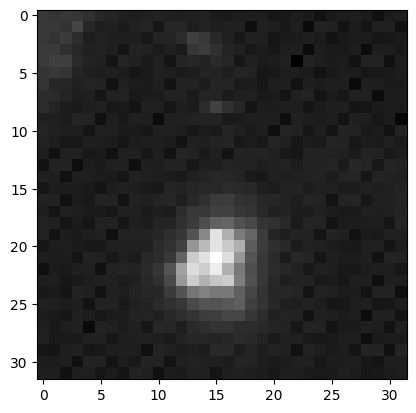

In [7]:
import matplotlib.pyplot as plt
from skimage import exposure
eels_haadf = ImageSequence(filepath2)
eels_haadf_data = eels_haadf.raw_data
eels_haadf_metadata = eels_haadf.raw_metadata
eels_haadf_metadata[0]
data = eels_haadf_data[0] 
# Normalize the data to 0-255 range
data = exposure.rescale_intensity(data, in_range=(data.min(), data.max()), out_range=(0, 255))
# Increase brightness using gamma correction
data = exposure.rescale_intensity(data, in_range=(data.min(), data.max()), out_range=(0, 255))
data = exposure.adjust_gamma(data, gamma=0.4)  
# Display the image
plt.imshow(data, cmap='gray')